### Описание данных
Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.

Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.

### Задание
* Выявите формулу дохода в целом и его составных частей
* Проверьте, что данная формула объясняет доход с точностью до рубля
* Выявите зависимости между составными частями дохода

### Данные
Таблица с данными находится по ссылке: https://docs.google.com/spreadsheets/d/1pypfj-34goi-qLNduEoruotdMHrtKr-4/edit?usp=sharing&ouid=107245467124159164043&rtpof=true&sd=true

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
def percent(a, b):
    # a - оклад + разные надбавки
    # b - оклад
    return ((a-b)*100)/b

In [3]:
# None выводит всё. Лимита нет
pd.options.display.max_columns = None

# аналогично со столбцами
pd.options.display.max_rows = None

In [4]:
raw_data = pd.read_excel('Задание 5.0 2 версия.xlsx')
raw_data['Доход'] = raw_data['Доход'].astype('int')
raw_data.head()

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790


### Общая формула

Исходя из задания общий вид формулы дохода выглядит следующим образом:
    
    доход = оклад + индивидуальная надбавка + доплата  + премия

Будем считать, что:
1. оклад зависит от должности, разряда и оборудования;
2. доплата начисляется за баллы вредности;
3. премия начисляется за превышение базового объема производства (процент от оклада);
4. индивидуальная надбавка рассчитывается для каждого сотрудника отдельно (процент от оклада).

Следовательно, для того, чтобы найти оклад, необходимо знать базовый объем производства.

### Базовый объем производства

Построим график, который будет показывать при каком значении объема производства начинается увеличение дохода. Также найдем все уникальные значения объема производства.

Исходя из графика и уникальных значений, делаем вывод, что базовый объем производства равен 820.

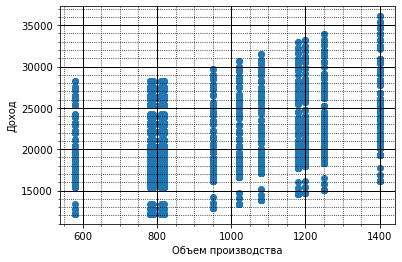

In [5]:
# график зависимости дохода от объема
plt.scatter(raw_data['Объем производства'], raw_data['Доход'])
plt.grid(color = 'black',
        linewidth = 1,
        linestyle = '-')
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.xlabel('Объем производства')
plt.ylabel('Доход')

plt.show()

In [6]:
# все варианты объема производства
print('Объем производства', sorted(raw_data['Объем производства'].unique()))

Объем производства [580, 780, 790, 810, 820, 950, 1020, 1080, 1180, 1200, 1250, 1400]


### Доплата

Доплату можно найти, если взять сотрудников с одинаковой должностью и разрядом, без индивидуальных надбавок и без превышения базового объема производства.

Такими сотрудниками являются уборщики. Разделив разность минимальных доходов при разной вредности на баллы вредности, получим оплату за один балл.

Доплата по 180 за каждый балл вредности

In [7]:
list((raw_data.groupby(['Профессия','Разряд', 'Вредность (балл.)']).groups).keys())

[('Вальцовщик', 5, 18),
 ('Вальцовщик', 6, 18),
 ('Вальцовщик', 7, 18),
 ('Контролер качества готовой продукции', 7, 0),
 ('Нагревальщик металла', 4, 22),
 ('Нагревальщик металла', 5, 22),
 ('Нагревальщик металла', 6, 22),
 ('Нагревальщик металла', 7, 22),
 ('Огнеупорщик', 4, 11),
 ('Оператор поста управления', 4, 8),
 ('Оператор поста управления', 5, 8),
 ('Подручный вальцовщика', 3, 18),
 ('Подручный вальцовщика', 4, 18),
 ('Посадчик металла', 4, 22),
 ('Резчик горячего металла', 4, 16),
 ('Уборщик', 3, 0),
 ('Уборщик', 3, 18)]

In [8]:
# датафрейм, в котором только уборщики без переработок
df_cleaner_no_overtime = raw_data[(raw_data['Профессия'] == 'Уборщик') & (raw_data['Объем производства'] <=820)]
df_cleaner_no_overtime

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638
11,Абрамов Е. Д.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16638
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16028
13,Абрамов Ф. М.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16029
14,Абрамов Ф. М.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16028
21,Абрамов Ф. М.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16028
23,Абрамов Ф. М.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16028


In [9]:
print('Доплата за один балл вредности: ',
     (df_cleaner_no_overtime[df_cleaner_no_overtime['Вредность (балл.)'] == 18]['Доход'].min() -
     df_cleaner_no_overtime[df_cleaner_no_overtime['Вредность (балл.)'] == 0]['Доход'].min())/18)

Доплата за один балл вредности:  180.0


### Индивидуальная надбавка

Начисляется отдельно для каждого сотрудника. Чтобы вычислить процент индивидуальной надбавки необходимо взять всех сотрудников, в доход которых не входит премия за превышение базового объема производства.  Минимальное значение дохода таких сотрудников будет равно окладу. Далее находим процент надбавки для каждого сотрудника и выводим минимальное и максимальное значение процента надбавки.

При наличии равна 5-10% оклада

In [10]:
df_no_overtime = raw_data[raw_data['Объем производства'] <=820]
df_no_overtime

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638
11,Абрамов Е. Д.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16638
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16028
13,Абрамов Ф. М.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16029
14,Абрамов Ф. М.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16028
21,Абрамов Ф. М.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16028
23,Абрамов Ф. М.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16028


In [11]:
# вычитаем доплату за вредность
# остается оклад + индивид. надбавка
df_no_overtime_minus_harm = df_no_overtime.copy()
df_no_overtime_minus_harm['Доход'] = df_no_overtime_minus_harm['Доход'] - 180*df_no_overtime_minus_harm['Вредность (балл.)']
df_no_overtime_minus_harm = df_no_overtime_minus_harm.sort_values(['Профессия', 'Разряд'])
df_no_overtime_minus_harm

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
72,Андреев Е. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,17209
73,Андреев Е. А.,2009-02-01,Вальцовщик,5,Калибровочный стан,18,790,17209
74,Андреев Е. А.,2009-03-01,Вальцовщик,5,Калибровочный стан,18,820,17209
81,Андреев Е. А.,2009-10-01,Вальцовщик,5,Калибровочный стан,18,780,17209
83,Андреев Е. А.,2009-12-01,Вальцовщик,5,Калибровочный стан,18,810,17209
288,Винокуров М. Т.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,17209
289,Винокуров М. Т.,2009-02-01,Вальцовщик,5,Калибровочный стан,18,790,17209
290,Винокуров М. Т.,2009-03-01,Вальцовщик,5,Калибровочный стан,18,820,17209
297,Винокуров М. Т.,2009-10-01,Вальцовщик,5,Калибровочный стан,18,780,17209
299,Винокуров М. Т.,2009-12-01,Вальцовщик,5,Калибровочный стан,18,810,17209


In [12]:
# профессия и разряд
prof_qual = list(df_no_overtime_minus_harm.groupby(['Профессия', 'Разряд']).groups)
prof_qual

[('Вальцовщик', 5),
 ('Вальцовщик', 6),
 ('Вальцовщик', 7),
 ('Контролер качества готовой продукции', 7),
 ('Нагревальщик металла', 4),
 ('Нагревальщик металла', 5),
 ('Нагревальщик металла', 6),
 ('Нагревальщик металла', 7),
 ('Огнеупорщик', 4),
 ('Оператор поста управления', 4),
 ('Оператор поста управления', 5),
 ('Подручный вальцовщика', 3),
 ('Подручный вальцовщика', 4),
 ('Посадчик металла', 4),
 ('Резчик горячего металла', 4),
 ('Уборщик', 3)]

In [13]:
# вычисляем процент индивидуальной надбавки
ind_pay = []

for i in prof_qual:
        temp_df = df_no_overtime_minus_harm.loc[(df_no_overtime_minus_harm['Профессия'] == i[0]) &
                              (df_no_overtime_minus_harm['Разряд'] == i[1])]
        ind_pay = ind_pay + list(percent(temp_df['Доход'], temp_df['Доход'].min()))
        temp_df['Надбавка'] = percent(temp_df['Доход'], temp_df['Доход'].min())

C:\Users\romal\AppData\Local\Temp/ipykernel_6532/4262434737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Надбавка'] = percent(temp_df['Доход'], temp_df['Доход'].min())
C:\Users\romal\AppData\Local\Temp/ipykernel_6532/4262434737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Надбавка'] = percent(temp_df['Доход'], temp_df['Доход'].min())
C:\Users\romal\AppData\Local\Temp/ipykernel_6532/4262434737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [14]:
df_no_overtime_minus_harm['Процент надбавки'] = ind_pay

print('Минимальная {}\nМаксимальная {}'.format(sorted(df_no_overtime_minus_harm['Процент надбавки'].unique())[1], 
                                              sorted(df_no_overtime_minus_harm['Процент надбавки'].unique())[-1]))

Минимальная 4.991789819376026
Максимальная 10.006711818902923


### Премия

Поскольку премия начисляется за работу сверх базового объема производства, необходимо взять всех сотрудников, объем производства превышает 820. Также в доход этих сотрудников не должны входить индивидуальные надбавки. Минимальное значение дохода будет равно окладу. Находим минимальный и максимальный процент премии.

Получаем, что процент премии равен 5-32% оклада (по 0.05% за каждый балл объема производства сверх базовых 820-ти)

In [15]:
df_no_overtime

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638
11,Абрамов Е. Д.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16638
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16028
13,Абрамов Ф. М.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16029
14,Абрамов Ф. М.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16028
21,Абрамов Ф. М.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16028
23,Абрамов Ф. М.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16028


In [16]:
# профессия, разряд, оклад
prof_qual_harm_sal = list(df_no_overtime.groupby(['Профессия', 'Разряд', 'Вредность (балл.)']).groups)

for i in range(len(prof_qual_harm_sal)):
    temp_df = df_no_overtime.loc[(df_no_overtime['Профессия'] == prof_qual_harm_sal[i][0]) &
                              (df_no_overtime['Разряд'] == prof_qual_harm_sal[i][1]) & 
                                 (df_no_overtime['Вредность (балл.)'] == prof_qual_harm_sal[i][2])]
    prof_qual_harm_sal[i] = prof_qual_harm_sal[i] +  (temp_df['Доход'].min(),)
    
prof_qual_harm_sal

[('Вальцовщик', 5, 18, 19629),
 ('Вальцовщик', 6, 18, 22260),
 ('Вальцовщик', 7, 18, 25299),
 ('Контролер качества готовой продукции', 7, 0, 22059),
 ('Нагревальщик металла', 4, 22, 18090),
 ('Нагревальщик металла', 5, 22, 20349),
 ('Нагревальщик металла', 6, 22, 22980),
 ('Нагревальщик металла', 7, 22, 26019),
 ('Огнеупорщик', 4, 11, 16110),
 ('Оператор поста управления', 4, 8, 15570),
 ('Оператор поста управления', 5, 8, 17829),
 ('Подручный вальцовщика', 3, 18, 15420),
 ('Подручный вальцовщика', 4, 18, 17370),
 ('Посадчик металла', 4, 22, 18090),
 ('Резчик горячего металла', 4, 16, 17010),
 ('Уборщик', 3, 0, 12180),
 ('Уборщик', 3, 18, 15420)]

In [17]:
# список тех, у кого нет надбавок
fio = []

for i in range(len(prof_qual_harm_sal)):
    temp_df = df_no_overtime.loc[(df_no_overtime['Профессия'] == prof_qual_harm_sal[i][0]) &
                              (df_no_overtime['Разряд'] == prof_qual_harm_sal[i][1]) &
                                            (df_no_overtime['Доход'] == prof_qual_harm_sal[i][3])]
    fio = fio + list(temp_df['FIO'].unique())
    
#fio

In [18]:
df_overtime = raw_data[raw_data['Объем производства'] > 820]
df_overtime.head()

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238


In [19]:
# удаляем работников с индивидуальными надбавками
df_overtime_no_individ = df_overtime.loc[df_overtime['FIO'].isin(fio)]
df_overtime_no_individ = df_overtime_no_individ.sort_values(['Профессия', 'Разряд'])
df_overtime_no_individ

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
1035,Кузнецов О. А.,2009-04-01,Вальцовщик,5,Калибровочный стан,18,1200,23004
1036,Кузнецов О. А.,2009-05-01,Вальцовщик,5,Калибровочный стан,18,1250,23486
1037,Кузнецов О. А.,2009-06-01,Вальцовщик,5,Калибровочный стан,18,950,20594
1038,Кузнецов О. А.,2009-07-01,Вальцовщик,5,Калибровочный стан,18,1400,24932
1039,Кузнецов О. А.,2009-08-01,Вальцовщик,5,Калибровочный стан,18,1180,22811
1040,Кузнецов О. А.,2009-09-01,Вальцовщик,5,Калибровочный стан,18,1080,21847
1042,Кузнецов О. А.,2009-11-01,Вальцовщик,5,Калибровочный стан,18,1020,21269
1311,Михайлов С. М.,2009-04-01,Вальцовщик,5,Калибровочный стан,18,1200,23004
1312,Михайлов С. М.,2009-05-01,Вальцовщик,5,Калибровочный стан,18,1250,23486
1313,Михайлов С. М.,2009-06-01,Вальцовщик,5,Калибровочный стан,18,950,20594


In [20]:
overtime_bonus = []

for i in prof_qual_harm_sal:
        temp_df = df_overtime_no_individ.loc[(df_overtime_no_individ['Профессия'] == i[0]) &
                              (df_overtime_no_individ['Разряд'] == i[1]) & 
                                             (df_overtime_no_individ['Вредность (балл.)'] == i[2])]
        
        overtime_bonus = overtime_bonus + list(percent(temp_df['Доход'], i[3]))

In [21]:
df_overtime_no_individ['Процент премии'] = overtime_bonus

print('Минимальная {}\nМаксимальная {}'.format(sorted(df_overtime_no_individ['Процент премии'].unique())[0], 
                                              sorted(df_overtime_no_individ['Процент премии'].unique())[-1]))

Минимальная 4.593698175787728
Максимальная 32.358674463937625


In [22]:
# проверяем размер минимальной премии
df_overtime_no_individ[df_overtime_no_individ['Процент премии'] < 4.6]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Процент премии
713,Ильин Э. П.,2009-06-01,Нагревальщик металла,4,Нагревательные печи,22,950,18921,4.593698
857,Колпаков И. А.,2009-06-01,Нагревальщик металла,4,Нагревательные печи,22,950,18921,4.593698
1397,Никитин Л. Г.,2009-06-01,Нагревальщик металла,4,Нагревательные печи,22,950,18921,4.593698
1433,Новиков А. В.,2009-06-01,Нагревальщик металла,4,Нагревательные печи,22,950,18921,4.593698
545,Егоров Г. И.,2009-06-01,Посадчик металла,4,Нагревательные печи,22,950,18921,4.593698
725,Ильинский Н. Д.,2009-06-01,Посадчик металла,4,Нагревательные печи,22,950,18921,4.593698
1505,Овчинников Д. В.,2009-06-01,Посадчик металла,4,Нагревательные печи,22,950,18921,4.593698
1877,Смирнов Л. К.,2009-06-01,Посадчик металла,4,Нагревательные печи,22,950,18921,4.593698


## Итог

Таким образом, итоговая формула имеет следующий вид:

    доход = оклад + 0|5-10%*оклад + 180*Вредность(балл) + 0|5-32%*оклад, где

1. оклад зависит от должности, разряда и оборудования;
2. доплата начисляется за баллы вредности (по 180.0 за один балл);
3. премия начисляется за превышение базового объема производства (5-32% оклада; по 0.05% оклада за каждую единицу превышения);
4. индивидуальная надбавка рассчитывается для каждого сотрудника отдельно (5-10% оклада, если есть надбавка).
